#df, safe(0) or not(1)

##importing libraries 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,model_selection,linear_model,metrics,svm,neighbors,tree
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

##load CSV dataset

In [11]:
df = pd.read_csv('dialogues_dataset_formatted_added_links_proc.csv',encoding='latin-1')
df

,label,text,Unnamed: 2
0,0,This is mike smith from orange. I am a sales r...,NaN
1,0,Hi this is mike jones from orange. I am the sa...,NaN
2,1,I am john doe from apple computers where I am ...,NaN
3,1,This is john candy from apple. I am a computer...,NaN
4,0,hi this is moe sislack from moes tavern. I am ...,NaN
...,...,...,...
5295,0,K..then come wenever u lik to come and also te...,NaN
5296,0,Pls call me da. What happen.,NaN
5297,0,Happy new year to u and ur family...may this n...,NaN
5298,0,No problem with the renewal. I.ll do it right ...,NaN


In [12]:
df.shape

(5300, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5300 non-null   int64 
 1   text        5300 non-null   object
 2   Unnamed: 2  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 124.3+ KB


In [14]:
df.isnull().sum()

label            0
text             0
Unnamed: 2    5296
dtype: int64

##drop 'Unnamed: 2' column

In [15]:
df.drop(['Unnamed: 2'],axis=1,inplace=True)

In [16]:
df

,label,text
0,0,This is mike smith from orange. I am a sales r...
1,0,Hi this is mike jones from orange. I am the sa...
2,1,I am john doe from apple computers where I am ...
3,1,This is john candy from apple. I am a computer...
4,0,hi this is moe sislack from moes tavern. I am ...
...,...,...
5295,0,K..then come wenever u lik to come and also te...
5296,0,Pls call me da. What happen.
5297,0,Happy new year to u and ur family...may this n...
5298,0,No problem with the renewal. I.ll do it right ...


##show the relationship between label and text 

Text(0, 0.5, 'text')

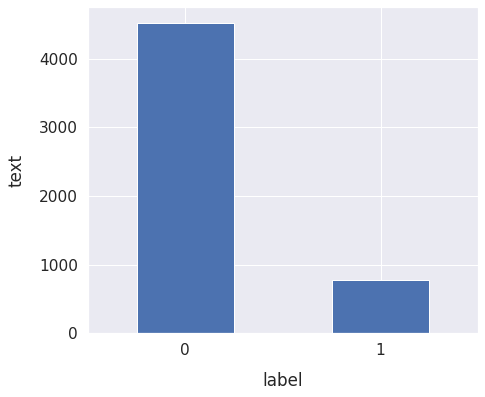

In [17]:
sns.set(font_scale=1.4)
df['label'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("label", labelpad=14)
plt.ylabel("text", labelpad=14)

In [18]:
df.label.value_counts()

0    4524
1     776
Name: label, dtype: int64

##Vectorizer

In [19]:
vectorizer = TfidfVectorizer(stop_words="english")

In [21]:
df_text = vectorizer.fit_transform(df['text'])
df_text

<5300x8275 sparse matrix of type '<class 'numpy.float64'>'
	with 42214 stored elements in Compressed Sparse Row format>

##x,y

In [22]:
x = df_text
x

<5300x8275 sparse matrix of type '<class 'numpy.float64'>'
	with 42214 stored elements in Compressed Sparse Row format>

In [24]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

##Test algorithms accuracy's score(before fitting)

In [25]:
models = []
models.append(("LR",linear_model.LogisticRegression()))
models.append(("Forest",RandomForestClassifier()))
models.append(("KNN",neighbors.KNeighborsClassifier()))
models.append(("SVM",svm.SVC()))
models.append(("Tree",tree.DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'

for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.940566 (0.037889)
Forest: 0.963962 (0.043128)
KNN: 0.892264 (0.038644)
SVM: 0.961132 (0.040776)
Tree: 0.955283 (0.039901)


##Split dataset into train and test

In [27]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,
  test_size=0.3,random_state=42,stratify=y,shuffle=True)


x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3710, 8275), (1590, 8275), (3710,), (1590,))

In [28]:
x_train

<3710x8275 sparse matrix of type '<class 'numpy.float64'>'
	with 29544 stored elements in Compressed Sparse Row format>

In [29]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

##Logistic Regression 

In [30]:
logistic_model = linear_model.LogisticRegressionCV()
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV()

precision score is: 0.9788359788359788
recall score is: 0.7939914163090128
f1 score is: 0.876777251184834
accuracy test score is: 0.9672955974842767
accuracy train score is: 0.9991913746630727


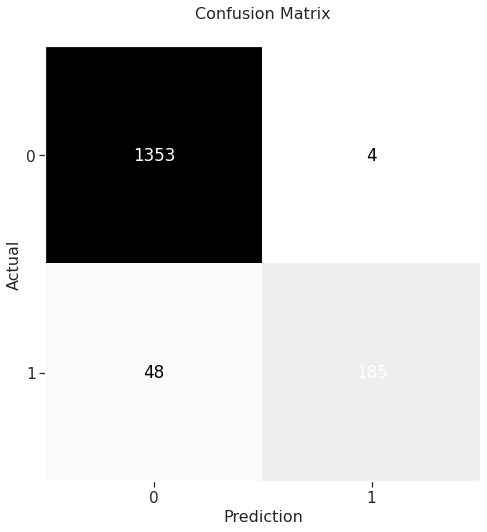

In [31]:
logistic_pred_train = logistic_model.predict(x_train)
logistic_pred = logistic_model.predict(x_test)

#precision = TP/TP+FP
print(f'precision score is: {metrics.precision_score(y_test,logistic_pred)}')
#recall = TP/TP+FN
print(f'recall score is: {metrics.recall_score(y_test,logistic_pred)}') 
#f1 = 2*precision*recall/precision+recall
print(f'f1 score is: {metrics.f1_score(y_test,logistic_pred)}') 
#accuracy = TP+TF/Total Samples
print(f'accuracy test score is: {metrics.accuracy_score(y_test,logistic_pred)}')
print(f'accuracy train score is: {metrics.accuracy_score(y_train,logistic_pred_train)}')

confusion_matrix=metrics.confusion_matrix(y_test,logistic_pred)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greys,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##Random Forest

In [32]:
forest_model = RandomForestClassifier()
forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
forest_pred_train = forest_model.predict(x_train)
forest_pred = forest_model.predict(x_test)

precision score is: 0.9781420765027322
recall score is: 0.7682403433476395
f1 score is: 0.860576923076923
accuracy test score is: 0.9635220125786164
accuracy train score is: 0.9991913746630727


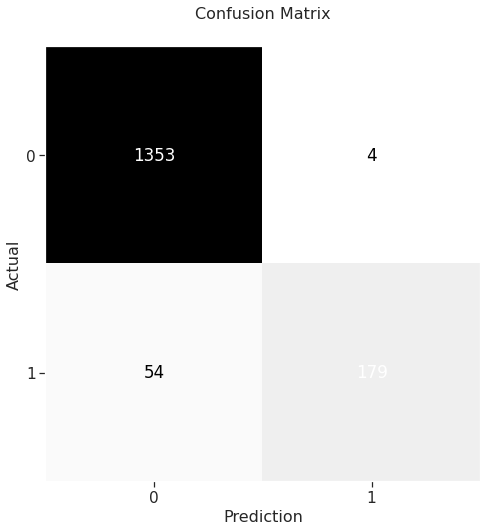

In [34]:
#precision = TP/TP+FP
print(f'precision score is: {metrics.precision_score(y_test,forest_pred)}')
#recall = TP/TP+FN
print(f'recall score is: {metrics.recall_score(y_test,forest_pred)}') 
#f1 = 2*precision*recall/precision+recall
print(f'f1 score is: {metrics.f1_score(y_test,forest_pred)}') 
#accuracy = TP+TF/Total Samples
print(f'accuracy test score is: {metrics.accuracy_score(y_test,forest_pred)}')
print(f'accuracy train score is: {metrics.accuracy_score(y_train,forest_pred_train)}')

confusion_matrix=metrics.confusion_matrix(y_test,forest_pred)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greys,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##KNN

In [35]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
knn_pred_train = knn_model.predict(x_train)
knn_pred = knn_model.predict(x_test)

precision score is: 0.9759036144578314
recall score is: 0.34763948497854075
f1 score is: 0.5126582278481012
accuracy test score is: 0.9031446540880503
accuracy train score is: 0.937466307277628


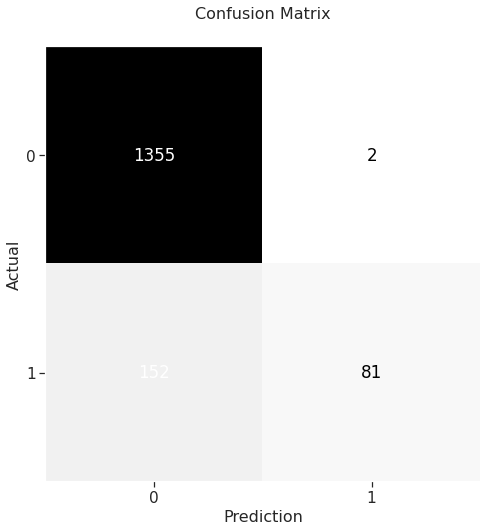

In [37]:
#precision = TP/TP+FP
print(f'precision score is: {metrics.precision_score(y_test,knn_pred)}')
#recall = TP/TP+FN
print(f'recall score is: {metrics.recall_score(y_test,knn_pred)}') 
#f1 = 2*precision*recall/precision+recall
print(f'f1 score is: {metrics.f1_score(y_test,knn_pred)}') 
#accuracy = TP+TF/Total Samples
print(f'accuracy test score is: {metrics.accuracy_score(y_test,knn_pred)}')
print(f'accuracy train score is: {metrics.accuracy_score(y_train,knn_pred_train)}')

confusion_matrix=metrics.confusion_matrix(y_test,knn_pred)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greys,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##SVM

In [38]:
svm_model = svm.SVC(kernel='linear',C=10,random_state=42)
svm_model.fit(x_train,y_train)

SVC(C=10, kernel='linear', random_state=42)

precision score is: 0.9743589743589743
recall score is: 0.8154506437768241
f1 score is: 0.8878504672897196
accuracy test score is: 0.969811320754717
accuracy train score is: 0.9989218328840971


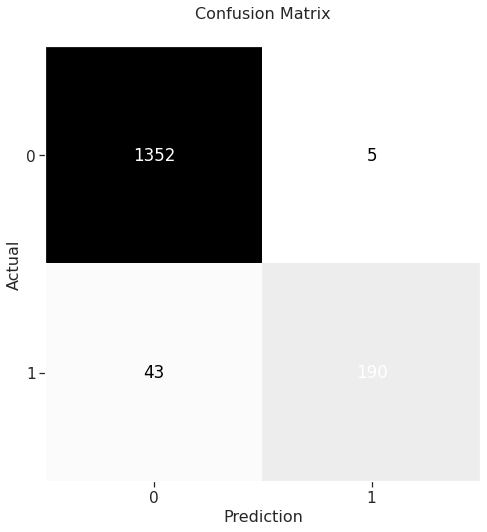

In [39]:
svm_pred = svm_model.predict(x_test)
svm_pred_train = svm_model.predict(x_train)


#precision = TP/TP+FP
print(f'precision score is: {metrics.precision_score(y_test,svm_pred)}')
#recall = TP/TP+FN
print(f'recall score is: {metrics.recall_score(y_test,svm_pred)}') 
#f1 = 2*precision*recall/precision+recall
print(f'f1 score is: {metrics.f1_score(y_test,svm_pred)}') 
#accuracy = TP+TF/Total Samples
print(f'accuracy test score is: {metrics.accuracy_score(y_test,svm_pred)}')
print(f'accuracy train score is: {metrics.accuracy_score(y_train,svm_pred_train)}')

confusion_matrix=metrics.confusion_matrix(y_test,svm_pred)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greys,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##Tree

In [40]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
tree_pred_train = tree_model.predict(x_train)
tree_pred = tree_model.predict(x_test)

precision score is: 0.8657407407407407
recall score is: 0.8025751072961373
f1 score is: 0.8329621380846326
accuracy test score is: 0.9528301886792453
accuracy train score is: 0.9991913746630727


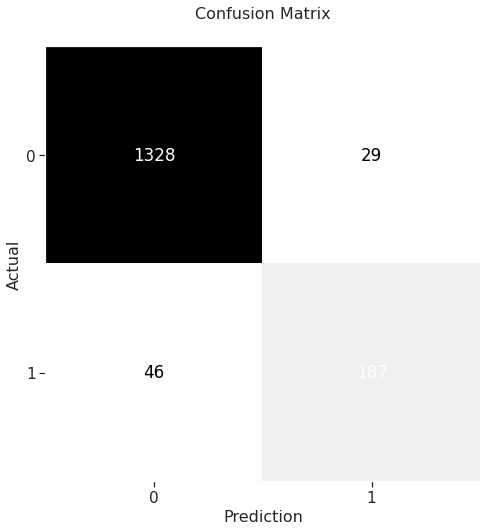

In [42]:
#precision = TP/TP+FP
print(f'precision score is: {metrics.precision_score(y_test,tree_pred)}')
#recall = TP/TP+FN
print(f'recall score is: {metrics.recall_score(y_test,tree_pred)}') 
#f1 = 2*precision*recall/precision+recall
print(f'f1 score is: {metrics.f1_score(y_test,tree_pred)}') 
#accuracy = TP+TF/Total Samples
print(f'accuracy test score is: {metrics.accuracy_score(y_test,tree_pred)}')
print(f'accuracy train score is: {metrics.accuracy_score(y_train,tree_pred_train)}')

confusion_matrix=metrics.confusion_matrix(y_test,tree_pred)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greys,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##predict new dataset

In [ ]:
#External Texts:

# 'hi, can you give me your password to access your e-mail?'
# 'hi, im jone from USA, can you translate this Spanish text into english to me?'

In [43]:
def output_label(n):
  if n == 0:
    return "Safe"
  elif n == 1:
    return "Not Safe"  

In [44]:
def test(news):
  testing_news = {"text":[news]}
  news_def = pd.DataFrame(testing_news)
  news_x_test = news_def["text"]
  news_xv_test = vectorizer.transform(news_x_test)

  svm_pred = svm_model.predict(news_xv_test)

  return print("\n\nPrediction: {}".format(output_label(svm_pred)))

In [45]:
news = str(input())
test(news)

URGENT. Important information for 02 user. Today is your lucky day! 2 find out why , log onto http://www.urawinner.com there is a fantastic surprise awaiting you !


Prediction: Not Safe


##joblib

In [46]:
from joblib import dump

In [47]:
dump(vectorizer,"vectorizer.joblib")
dump(svm_model,"model.joblib")

['model.joblib']